In [53]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
from sklearn import preprocessing

%matplotlib inline

In [3]:
df = pd.read_csv("homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [4]:
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price', axis=1))
scaled_y = sy.fit_transform(df['price'].values.reshape(-1,1))

In [5]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [6]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

# Batch Gradient Descent

In [39]:
def batch_gradient_descent(X, y_true, epochs, learning_rate):
    number_of_features = X.shape[1]

    w = np.ones(shape=(number_of_features)) # [1, 1] -> [w1, w2]
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_pred = np.dot(w, X.T) + b
        # derivates
        w_grad = -(2/total_samples) * np.dot(X.T, (y_true - y_pred))
        b_grad = -(2/total_samples) * np.sum(y_true - y_pred)
        # print(w_grad)
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_pred - y_true))

        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list


In [40]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0]), 500, 0.01)

In [41]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

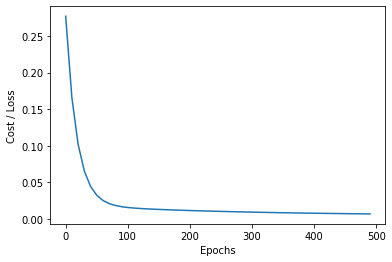

In [42]:
plt.xlabel("Epochs")
plt.ylabel("Cost / Loss")
plt.plot(epoch_list, cost_list)

In [50]:
def predict(area, bedrooms, w, b):
    scaled_X = sx.transform([[area, bedrooms]])
    scaled_price = w[0] * scaled_X[0][0] + w[1] * scaled_X[0][1] + b

    # revrese transform
    return sy.inverse_transform([[scaled_price]])[0][0]

In [52]:
predict(1000 ,2, w, b)

30.253094462442355

# Stochastic Gradient Descent

In [54]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate):
    number_of_features = X.shape[1]

    w = np.ones(shape=(number_of_features)) # [1, 1] -> [w1, w2]
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0, total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]

        y_pred = np.dot(w, sample_x.T) + b
        # derivates
        w_grad = -(2/total_samples) * np.dot(sample_x.T, (sample_y - y_pred))
        b_grad = -(2/total_samples) * (sample_y - y_pred)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_pred - sample_y))

        if i%100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

In [58]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0]), 10000, 0.01)

In [59]:
w_sgd, b_sgd, cost_sgd

(array([0.70490736, 0.67472085]), -0.23118364136920727, 0.00034332362090181665)

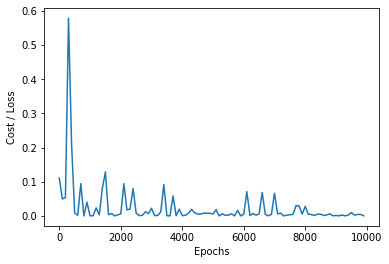

In [60]:
plt.xlabel("Epochs")
plt.ylabel("Cost / Loss")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [61]:
predict(1000 ,2, w_sgd, b_sgd)

30.124967834107384

# Mini Batch Gradient Descent

In [111]:
def mini_batch_gradient_descent(X, y_true, epochs, learning_rate, batch_size):
    number_of_features = X.shape[1]

    w = np.ones(shape=(number_of_features)) # [1, 1] -> [w1, w2]
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        for j in range(0, total_samples, batch_size):
            random_indices = random.sample(range(total_samples), batch_size)
            batch_x = X[random_indices]
            batch_y = y_true[random_indices]

            y_pred = np.dot(w, batch_x.T) + b

            # derivates
            w_grad = -(2/batch_size) * np.dot(batch_x.T, (batch_y - y_pred))
            b_grad = -(2/batch_size) * np.sum(batch_y - y_pred)

            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad

            cost = np.mean(np.square(y_pred - batch_y))

            if i%10 == 0:
                cost_list.append(cost)
                epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list
            

In [112]:
w_mbgd, b_mbgd, cost_mbgd, cost_list_mbgd, epoch_list_mbgd = mini_batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0]), 1000, 0.01, 10)

In [113]:
w_mbgd, b_mbgd, cost_mbgd

(array([0.6718388 , 0.53478473]), -0.14455972927092173, 0.006388413359811615)

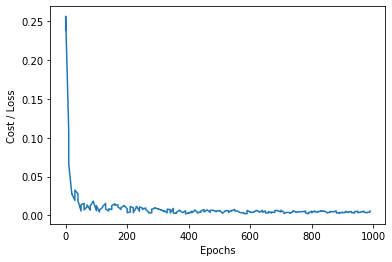

In [114]:
plt.xlabel("Epochs")
plt.ylabel("Cost / Loss")
plt.plot(epoch_list_mbgd, cost_list_mbgd)


In [115]:
predict(1000, 2, w_mbgd, b_mbgd)


36.78847206046756

In [108]:
predict(2600, 4, w_mbgd, b_mbgd)

122.5867467951049